<a href="https://www.kaggle.com/code/peeyushaga/devcom-task-1?scriptVersionId=134332765" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-nearest-earth-objects/neo_v2.csv
/kaggle/input/nasa-nearest-earth-objects/neo.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
neo_pd = pd.read_csv("/kaggle/input/nasa-nearest-earth-objects/neo.csv")
neo_pd.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [4]:
neo_pd = neo_pd.sample(n = len(neo_pd), random_state = 1)

In [5]:
neo_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90836 entries, 12801 to 77708
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 6.4+ MB


In [6]:
neo_pd.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [7]:
bool_columns = [col for col in neo_pd.columns if neo_pd[col].dtype == 'bool']
neo_pd[bool_columns] = neo_pd[bool_columns].astype(int)

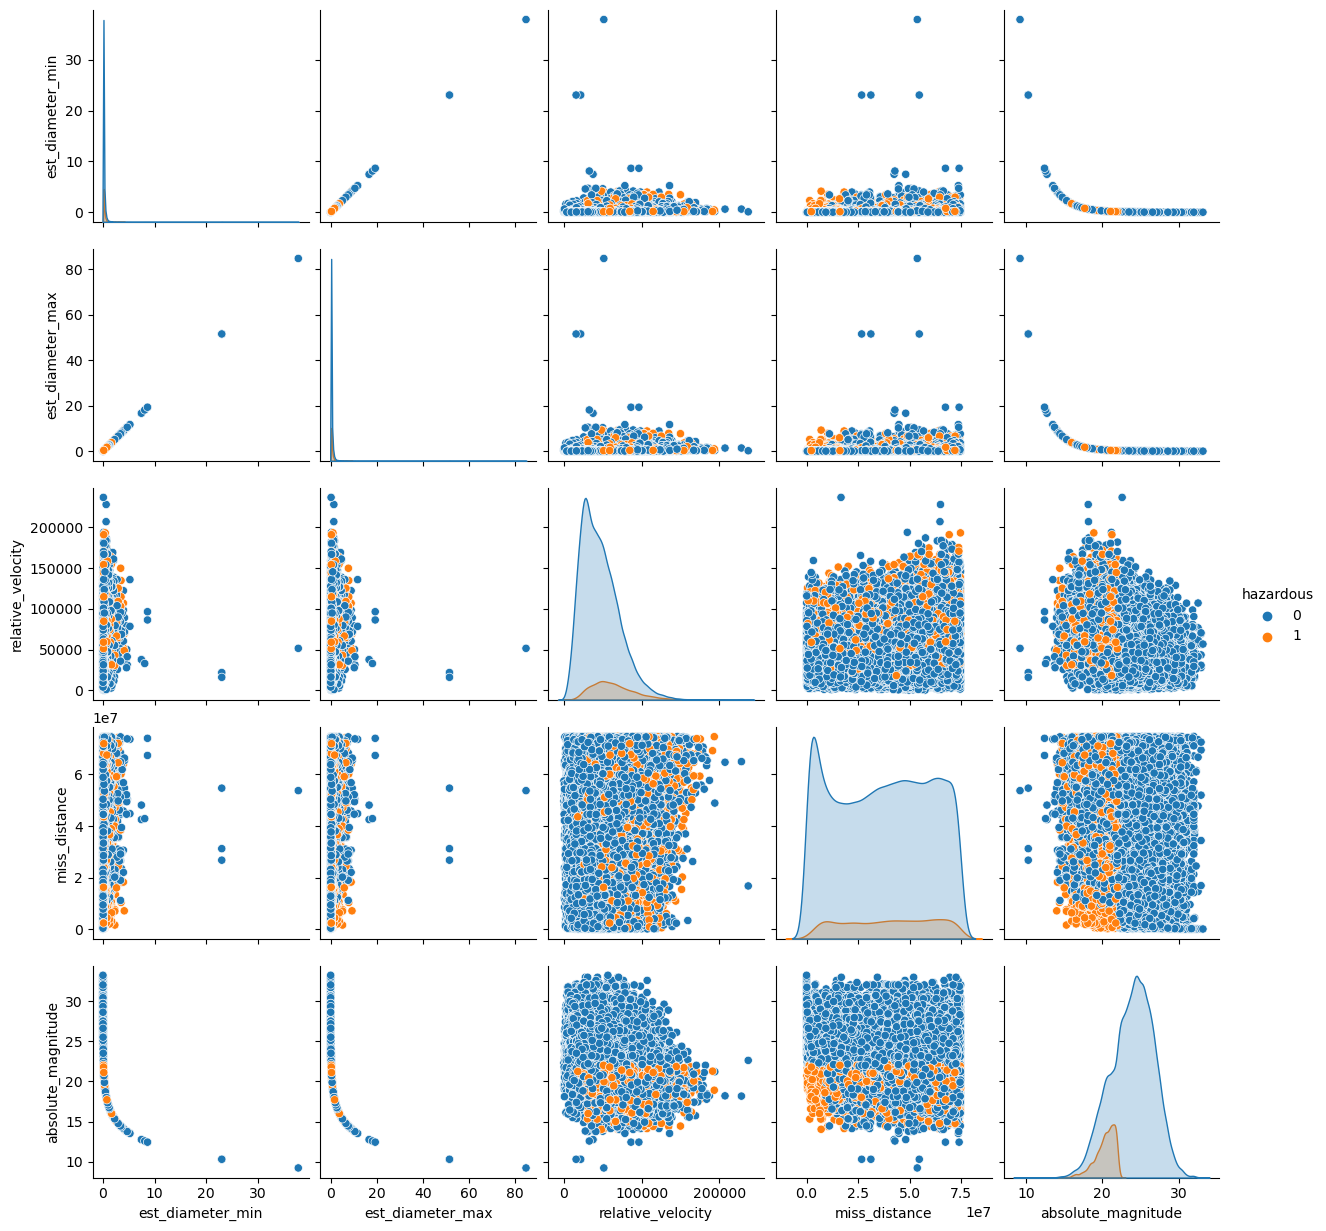

In [8]:
num_columns = [col for col in neo_pd.columns if neo_pd[col].dtype == 'float64']
fig= sns.pairplot(neo_pd[num_columns+['hazardous']],hue = 'hazardous')

In [9]:
orbiting_body_dummy = pd.get_dummies(neo_pd['orbiting_body'])
neo_pd = pd.concat([neo_pd.drop('orbiting_body', axis = 1), orbiting_body_dummy],axis =1)

In [10]:
neo_pd

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,sentry_object,absolute_magnitude,hazardous,Earth
12801,3663258,(2014 EL),0.010582,0.023661,67869.925234,3.379682e+07,0,27.00,0,1
55325,3831894,(2018 UH1),0.025384,0.056760,46806.049907,2.042376e+06,0,25.10,0,1
2647,3552664,(2010 WC9),0.053034,0.118588,73992.588857,4.700788e+07,0,23.50,0,1
48068,3843919,(2019 SU1),0.005553,0.012418,10954.654223,2.392963e+07,0,28.40,0,1
41662,2511684,511684 (2015 BN509),0.183044,0.409298,96979.038270,4.103778e+07,0,20.81,1,1
...,...,...,...,...,...,...,...,...,...,...
21440,3471585,(2009 UC),0.012722,0.028447,48802.959010,9.377322e+06,0,26.60,0,1
73349,54114207,(2021 CE5),0.021113,0.047211,55483.580922,1.806974e+07,0,25.50,0,1
50057,3781911,(2017 SL17),0.105817,0.236614,51161.607200,1.619446e+07,0,22.00,1,1
5192,3758270,(2016 QE45),0.117099,0.261842,58978.627028,2.326581e+06,0,21.78,1,1


In [11]:
X = neo_pd.drop(['id','name','hazardous'], axis = 1)
y = neo_pd['hazardous']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=123)

In [13]:
X_train.shape, X_test.shape

((72668, 7), (18168, 7))

In [14]:
y_train.shape, y_test.shape

((72668,), (18168,))

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_to_scale = [col for col in X_train.columns if X_train[col].dtype == 'float64']

scaler.fit(X_train[columns_to_scale])

X_train[columns_to_scale] = scaler.transform(X_train[columns_to_scale])
# X_valid[columns_to_scale] = scaler.transform(X_valid[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [16]:
X_train.describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,sentry_object,absolute_magnitude,Earth
count,7.266800e+04,7.266800e+04,7.266800e+04,7.266800e+04,72668.0,7.266800e+04,72668.0
mean,-6.942331e-18,1.251575e-17,-8.506801e-17,5.201860e-17,0.0,3.692147e-16,1.0
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,0.0,1.000007e+00,0.0
min,-4.093273e-01,-4.093273e-01,-1.893533e+00,-1.653562e+00,0.0,-4.930134e+00,1.0
25%,-3.496786e-01,-3.496786e-01,-7.701453e-01,-8.889272e-01,0.0,-7.640446e-01,1.0
50%,-2.561791e-01,-2.561791e-01,-1.538874e-01,3.408540e-02,0.0,6.020657e-02,1.0
75%,5.544977e-02,5.544977e-02,5.909805e-01,8.720484e-01,0.0,7.499565e-01,1.0
max,1.212884e+02,1.212884e+02,6.285456e+00,1.688655e+00,0.0,3.250300e+00,1.0


In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

Best Hyperparameters:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Accuracy:  0.9021164759520881
Kernel: rbf
Precision: 0.8189
F1-Score: 0.8598


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


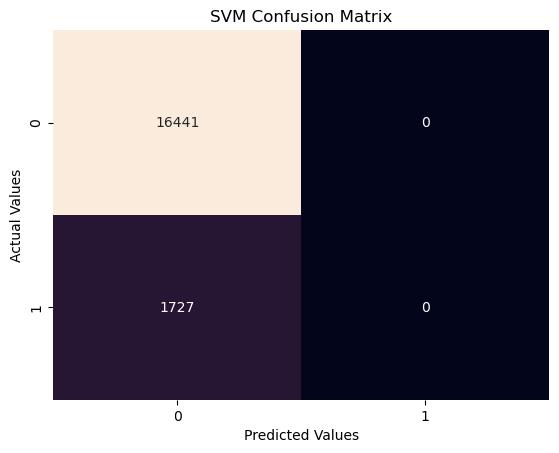

In [18]:
param_grid = {
    'C': [0.1],
    'gamma': [0.1],
    'kernel': ['rbf']
}
svm = SVC()

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

svm = grid_search.best_estimator_
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
    
confusion_mtrx = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mtrx, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('SVM Confusion Matrix')

print(f"Kernel: rbf")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")

Kernel: poly
Precision: 0.8999
F1-Score: 0.8788


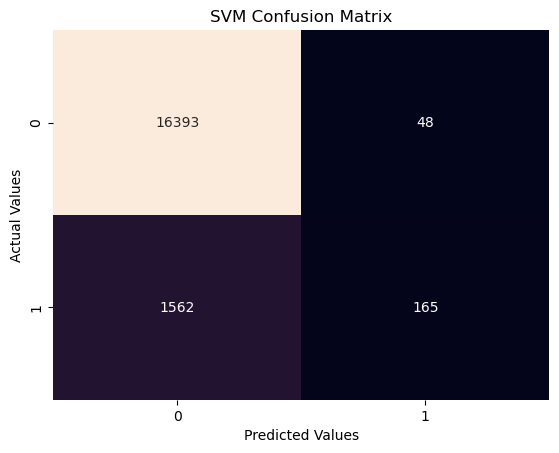

In [19]:
    kernel = 'poly'
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    
    y_pred = svm.predict(X_test)

    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    confusion_mtrx = confusion_matrix(y_test, y_pred)
    sns.heatmap(confusion_mtrx, annot=True, fmt='g', cbar=False)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('SVM Confusion Matrix')
    
    print(f"Kernel: {kernel}")
    print(f"Precision: {precision:.4f}")
    print(f"F1-Score: {f1:.4f}")

Kernel: rbf
Precision: 0.9018
F1-Score: 0.8805


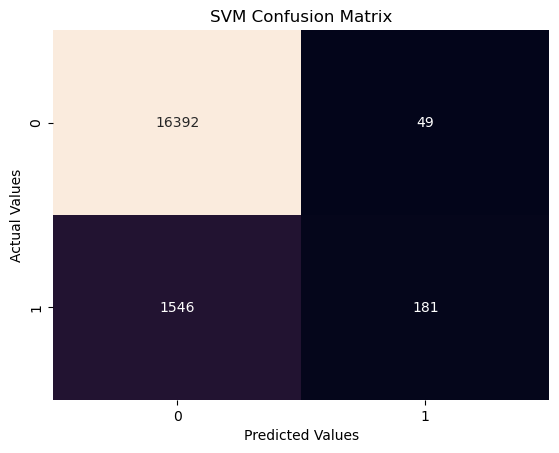

In [20]:
    kernel = 'rbf'
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    
    y_pred = svm.predict(X_test)

    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    confusion_mtrx = confusion_matrix(y_test, y_pred)
    sns.heatmap(confusion_mtrx, annot=True, fmt='g', cbar=False)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('SVM Confusion Matrix')
    
    print(f"Kernel: {kernel}")
    print(f"Precision: {precision:.4f}")
    print(f"F1-Score: {f1:.4f}")

Kernel: sigmoid
Precision: 0.8410
F1-Score: 0.8408


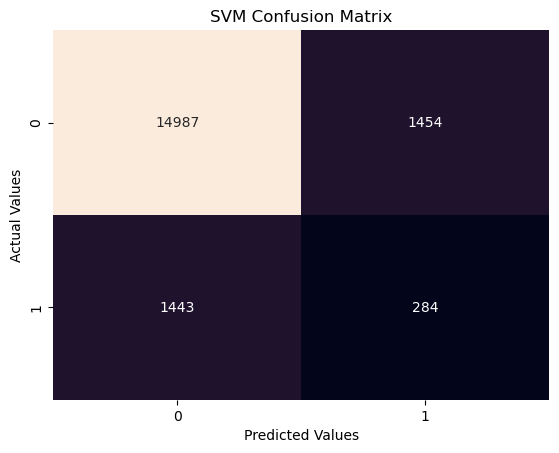

In [21]:
    kernel = 'sigmoid'
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    
    y_pred = svm.predict(X_test)

    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    confusion_mtrx = confusion_matrix(y_test, y_pred)
    sns.heatmap(confusion_mtrx, annot=True, fmt='g', cbar=False)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('SVM Confusion Matrix')
    
    print(f"Kernel: {kernel}")
    print(f"Precision: {precision:.4f}")
    print(f"F1-Score: {f1:.4f}")